In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
train_dir = "/content/drive/MyDrive/Kaggle Competitions/messy-vs-clean-room/images/train"
validation_dir = "/content/drive/MyDrive/Kaggle Competitions/messy-vs-clean-room/images/val"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=25,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    fill_mode="nearest",
    horizontal_flip=True,
)
valid_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=25,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    fill_mode="nearest",
    horizontal_flip=True,
)


train_set = train_gen.flow_from_directory(
    directory=train_dir,
    batch_size=16,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    subset="training",
)
valid_set = valid_gen.flow_from_directory(
    directory=validation_dir,
    batch_size=2,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    subset="validation",
)


Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(input_shape = (224, 224, 3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [26]:
x = tf.keras.layers.Flatten()(vgg.output)
x = tf.keras.layers.Dense(56, activation = 'relu')(x)
x = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
model = tf.keras.models.Model(vgg.input, x)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'acc')
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1, mode='auto',
        restore_best_weights=True)

In [ ]:
history = model.fit(train_generator, validation_data = validation_generator,
                    epochs = 20, verbose = 1, callbacks = [monitor])

In [28]:
history = model.fit(train_set, steps_per_epoch = 8,validation_data = valid_set, validation_steps = 8,
                    epochs = 50, verbose = 1, callbacks = [monitor])

Epoch 1/50
8/8 [==============================] - 5s 477ms/step - loss: 0.9139 - acc: 0.6484 - val_loss: 0.8163 - val_acc: 0.6250
Epoch 2/50
8/8 [==============================] - 3s 412ms/step - loss: 0.3742 - acc: 0.8438 - val_loss: 0.1599 - val_acc: 0.9375
Epoch 3/50
8/8 [==============================] - 3s 414ms/step - loss: 0.2048 - acc: 0.9062 - val_loss: 0.1564 - val_acc: 0.9375
Epoch 4/50
8/8 [==============================] - 3s 405ms/step - loss: 0.1948 - acc: 0.9297 - val_loss: 0.1652 - val_acc: 0.9375
Epoch 5/50
8/8 [==============================] - 3s 415ms/step - loss: 0.1700 - acc: 0.9297 - val_loss: 0.1890 - val_acc: 0.8750
Epoch 6/50
8/8 [==============================] - 3s 420ms/step - loss: 0.1402 - acc: 0.9453 - val_loss: 0.1231 - val_acc: 0.8750
Epoch 7/50
8/8 [==============================] - 3s 406ms/step - loss: 0.1319 - acc: 0.9609 - val_loss: 0.1711 - val_acc: 0.9375
Epoch 8/50
8/8 [==============================] - 3s 403ms/step - loss: 0.1943 - acc: 0.92

In [29]:
model.save('/content/drive/MyDrive/clean-messy_model3')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/clean-messy_model3/assets


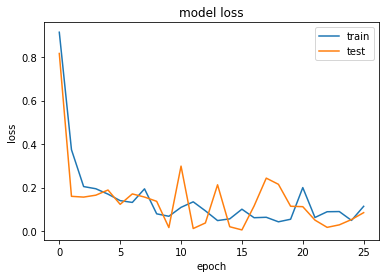

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [72]:
from keras.preprocessing import image
from PIL import Image
img = Image.open('/content/drive/MyDrive/Kaggle Competitions/messy-vs-clean-room/images/test/unclassified/0.png')
img = tf.keras.utils.img_to_array(img)
print(img.shape)
from keras.preprocessing import image
img1 = tf.image.resize(img, (224, 224), method = tf.image.ResizeMethod.BILINEAR, preserve_aspect_ratio = True)
img1 = np.array(img1)
img1 = img1.reshape(1, 224, 224, 3)
prob = model.predict(img1)
if prob[0] > 0.5:
    print("Messy")
else:
    print("Clean")



(1, 224, 224, 3)
Messy
